In [3]:
%matplotlib inline

In [6]:
import numpy as np
import os
import pickle
import argparse
import scipy
import sys

from skspatial.objects import Line
from skspatial.objects import Points
from skspatial.plotting import plot_3d

import matplotlib.pyplot as plt

MaxEvents = 100
t1 = -7
t2 = 7
# use 100k event data
filename = "EnergyLoss.10k.v1.data"

if filename != "":
    FileName = filename
if not os.path.exists(FileName):
    print("Error: The training data file does not exist: {}".format(FileName))
    sys.exit(0)

with open(FileName, "rb") as FileHandle:
   DataSets = pickle.load(FileHandle)

all_inc_energy = []
all_measured_energy = []
all_rmse = []
all_hit_energy = []

for i in range(0, len(DataSets)):
    this_data = []
    this_point = []
    Event = DataSets[i]
    k = [0, 0, 1]
    for h in range(0, Event.hits.shape[0]):
        X = Event.hits[h, 0]
        Y = Event.hits[h, 1]
        Z = Event.hits[h, 2]
        this_point = [X, Y, Z]
        if Event.hits[h, 3] != 0:
            this_data.append(this_point)
            all_hit_energy.append(Event.hits[h, 3])

    points = Points(this_data)
    fit = Line.best_fit(points)
    
    rmse = 0
    for j in range(len(this_data)):
        # use hit energy
        rmse += (fit.distance_point(this_data[j])/all_hit_energy[j])**2
        
    rmse = np.sqrt(rmse/len(this_data))
    all_inc_energy.append(Event.gamma_energy)
    all_measured_energy.append(Event.measured_energy)
    all_rmse.append(rmse)

Text(0, 0.5, 'Deviation (RMSE)')

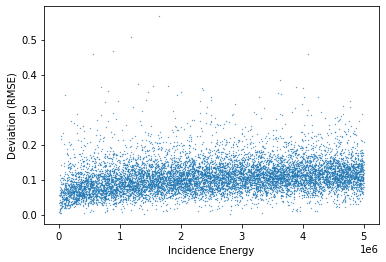

In [7]:
plt.scatter(all_inc_energy, all_rmse, s=0.1)
plt.xlabel("Incidence Energy")
plt.ylabel("Deviation (RMSE)")

Text(0, 0.5, 'Deviation (RMSE)')

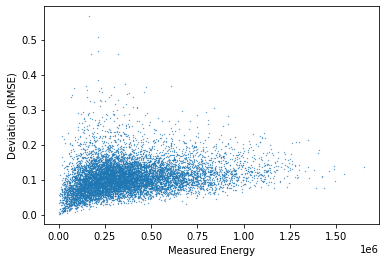

In [8]:
plt.scatter(all_measured_energy, all_rmse, s=0.1)
plt.xlabel("Measured Energy")
plt.ylabel("Deviation (RMSE)")

Text(0, 0.5, 'Measured Energy')

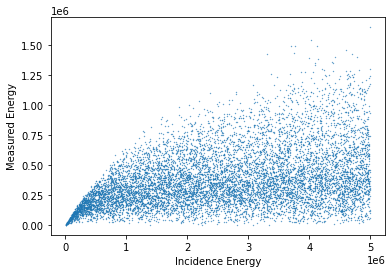

In [9]:
plt.scatter(all_inc_energy, all_measured_energy, s=0.1)
plt.xlabel("Incidence Energy")
plt.ylabel("Measured Energy")

(<Figure size 432x288 with 1 Axes>, <Axes3DSubplot:>)

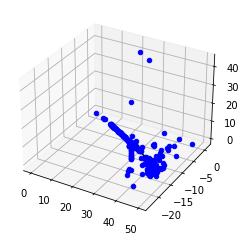

In [10]:
this_data = []
this_point = []
Event = DataSets[3]
for h in range(0, Event.hits.shape[0]):
    X = Event.hits[h, 0]
    Y = Event.hits[h, 1]
    Z = Event.hits[h, 2]
    this_point = [X, Y, Z]
    this_data.append(this_point)

points = Points(this_data)
fit = Line.best_fit(points)
direction = fit.direction
plot_3d(fit.plotter(t_1=t1, t_2=t2, c='k'), points.plotter(c='b', depthshade=False))